In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [2]:
import matplotlib.patches as mpatches

In [3]:
#This notebook is for initial assessment of NYC valuation data

In [4]:
propval = pd.read_csv('clean_propval.csv')

C:\Users\marcu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,18,35,58,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
datadict = pd.read_excel('property_valuation_dictionary.xlsx')

In [ ]:
len(propval)

In [ ]:
propval.columns[110:117]

In [ ]:
#Location data:
#BBLE, BORO, BLOCK, LOT, EASE, SECVOL, DISTRICT
#HNUM_LO, HNUM_HI, STR_NAME, ZIP
#CP_BORO, CP_DIST, LIMIT, O_LIMIT

In [ ]:
#Time data:
#YEAR4, FV_CHGDT, CHGDT, FCHGDT
#YRB, YRB_FLAG, YRB_RNG, YRA1, YRA1_RNG, YRA2, YRA2_RNG

In [ ]:
#Financial data:
#CUR_FV_L, CUR_FV_T, NEW_FV_L, NEW_FV_T
#CURAVL, CURAVT, CUREXL, CUREXT, CURAVL_A, CURAVT_A, CUREXL_A, CUREXT_A
#TN_AVL, TN_AVT, TN_EXL, TN_EXT, TN_AVL_A, TN_AVT_A, TN_EXL_A, TN_EXT_A
#FN_AVL, FN_AVT, FN_EXL, FN_EXT, FN_AVL_A, FN_AVT_A, FN_EXL_A, FN_EXT_A
#VALREF

In [ ]:
#Tax data:
#TXCL, O_TXCL, CBN_TXCL
#APPLIC, APPLIC2, O_APPLIC

In [ ]:
#Property data
#BLDGCL, XCMTCL, OWNER, TOT_UNIT, RES_UNIT
#LFRT_DEC, LDEP_DEC, L_ACRE_, IRREG, BFRT_DEC, BDEP_DEC, BLD_VAR, EXT, STORY,
#BLDGS, CORNER, LND_AREA, GR_SQFT, ZONING, 
#STATUS1, STATUS2, NEWLOT, DROPLOT, NOAV
#CONDO_NM, CONDO_S1, CONDO_S2
#CONMINT_L, CONMINT_B, APTNO, AP_BORO, AP_BLOCK, AP_LOT, AP_EASE, AP_DATE, AP_TIME
#PROTEST, AT_GRP, PROTEST2, AT_GRP2, O_PROTEST, O_AT_GRP, REUC
#GEO_RC, COOP_NUM, EX_INDS, EX_COUNT, EX_CHDT, DCHGDT, SM_CHGDT

In [ ]:
#Expected superfluous but need investigation:
#FV_CHGDT, date of last on-line change to CUR_FV_L/CUR_FV_T. Needs investigation.
#CHGDT, date of last money change occuring during Tentative Period/Change by notice period
#FCHDTD, date of last money change occuring during final
#Can safely cut:
#DELCHG, CORCHG, NODESC, MBLDG, CONDO_S3, CONDO_A: Not used
#BBLE is a concatenation of four other terms and not very machine-readable.

In [ ]:
#In total: 118 columns. Can safely cut seven.

In [ ]:
#What are we predicting? Current thoughts: 
#CUR_FV_L, CUR_FV_T, NEW_FV_L and NEW_FV_T.
#Current and new market value of land and total.
#FN_AVL_A, FN_AVT_A, FN_EXL_A, FN_EXT_A
#Final actual assessed and exempt land and total value

In [ ]:
#Expected key variables:
#BORO: Manhattan? Queens? Bronx?
#BLOCK: Block #. Will need to normalize the Bronx data.
#EASE: Type of easement, if any.
#YEAR: Housing data. 2010-2017, so will not include 2008 crash, but that's so extraordinary
#it may be for the best.
#TN_ codes indicate tentative assessment valuations. Likely to be close to final data, but
#not sure how close. Want to build models with and without, if they are good predictors.
#TXCL: Tax class.
#BLDGCL": Direct corellation between this and TXCL
#YRB: Year building was built. May not have full story: Check YRB_FLAG, YRB_RNG

In [ ]:
#TODO: Determine relationship between assessed value and exempt value: May be fixed amount.
#Determine relationship between market value and assessed value.
#Determine relationship between land price and total price.
#Normalize Bronx BLOCK data.
#Normalize EASE data.
#Determine TXCL/BLDCL relationship.

In [ ]:
#How technical I get is somewhat personal preference
#Value in domain expertese
#Make sure I understand more than I say, but don't lead with the technical

In [ ]:
boro_relation = propval.groupby('BORO').mean()

In [ ]:
boro_std = propval.groupby('BORO').std()

In [ ]:
boro_std['CUR_FV_L']

In [ ]:
boro = ['MANHATTAN', '   BRONX   ', 'BROOKLYN', '  QUEENS  ', 'STATEN ISLAND']

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(x = boro, height = boro_relation['CUR_FV_L'], yerr = boro_std['CUR_FV_L'])
axs[0, 0].set_title('Mean current land value')
axs[0, 1].bar(x = boro, height = boro_relation['CUR_FV_T'], yerr = boro_std['CUR_FV_T'])
axs[0, 1].set_title('Mean current total value')
axs[1, 0].bar(x = boro, height = boro_relation['FN_AVL_A'], yerr = boro_std['FN_AVL_A'])
axs[1, 0].set_title('Mean final assessed land value')
axs[1, 1].bar(x = boro, height = boro_relation['FN_AVT_A'], yerr = boro_std['FN_AVT_A'])
axs[1, 1].set_title('Mean final assessed total value')
plt.sca(axs[1,0])
plt.xticks(rotation=75)
plt.sca(axs[1,1])
plt.xticks(rotation=75)
for ax in axs.flat:
    ax.label_outer()

In [ ]:
manhattan_block = propval[propval['BORO'] == 1].groupby('BLOCK').mean()

In [ ]:
#Try as one model, split out more if needed

In [ ]:
plt.scatter(x=manhattan_block.index, y=manhattan_block['CUR_FV_T'])
plt.title('Mean CUR_FV_T per manhattan block')

In [ ]:
has_easement = propval.EASE.dropna()

In [ ]:
len(has_easement)

In [ ]:
has_easement.value_counts()

In [ ]:
year_relation = propval.groupby('YEAR4').mean()

In [ ]:
plt.scatter(x=year_relation.index, y=year_relation['CUR_FV_T'])
plt.title('mean CUR_FV_T per year')

In [ ]:
#Separate year modeling out into two separate problems
#Try to align on time: Use all 2017 data as is

In [ ]:
propval['TXCL'].value_counts()

In [ ]:
#This data tracks:
#Mostly 1-3 unit residences
#Then residential vancant land and 1-3 story condos
#Some 1-3 unit condos
#almost no bungalo colonies

In [ ]:
tax_relation = propval.groupby('TXCL').mean()

In [ ]:
plt.scatter(x=tax_relation.index, y = tax_relation['CUR_FV_T'])
plt.title('mean CUR_FV_T by tax class')

In [ ]:
old_relation = propval.groupby('YRB').mean()
old_relation = old_relation[old_relation.index != 0]

In [ ]:
plt.scatter(x=old_relation.index, y = old_relation['CUR_FV_T'])
plt.title('Mean CUR_FV_T by year built')

In [6]:
year = propval[propval.YRB != 0]

In [ ]:
yearzero = propval[propval.YRB == 0]

In [ ]:
len(yearzero)

In [7]:
def color(data):
    return data.map({1: 'red', 2: 'orange', 
                     3: 'yellow', 4: 'green', 
                     5: 'blue'})

Text(0, 0.5, 'Valuation')

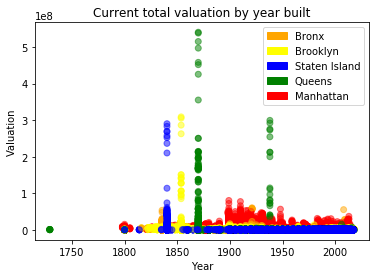

In [10]:
plt.scatter(x=year.YRB, y = year.CUR_FV_T, c = color(year.BORO), alpha = 0.5)
plt.title('Current total valuation by year built')
plt.legend('upper left')
blue_patch = mpatches.Patch(color='red', label='Manhattan')
red_patch = mpatches.Patch(color='orange', label='Bronx')
orange_patch = mpatches.Patch(color='yellow', label='Brooklyn')
green_patch = mpatches.Patch(color='green', label='Queens')
yellow_patch = mpatches.Patch(color='blue', label='Staten Island')
plt.legend(handles=[red_patch, orange_patch, yellow_patch, green_patch, blue_patch])
plt.xlabel('Year')
plt.ylabel('Valuation')

Text(0, 0.5, 'Valuation')

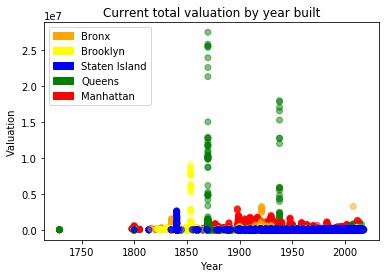

In [9]:
plt.scatter(x=year.YRB, y = year.FN_AVT_A, c = color(year.BORO), alpha = 0.5)
plt.title('Current total valuation by year built')
plt.legend('upper left')
blue_patch = mpatches.Patch(color='red', label='Manhattan')
red_patch = mpatches.Patch(color='orange', label='Bronx')
orange_patch = mpatches.Patch(color='yellow', label='Brooklyn')
green_patch = mpatches.Patch(color='green', label='Queens')
yellow_patch = mpatches.Patch(color='blue', label='Staten Island')
plt.legend(handles=[red_patch, orange_patch, yellow_patch, green_patch, blue_patch])
plt.xlabel('Year')
plt.ylabel('Valuation')

In [ ]:
#Survivorship bias

In [ ]:
print(5)

In [ ]:
story_relation = propval.groupby('STORY').mean()

In [ ]:
plt.scatter(x=story_relation.index, y = story_relation['CUR_FV_T'])
plt.xlim((0,10))
plt.title('Mean valuation by building stories')
plt.xlabel('Number of stories')
plt.ylabel('Valuation')

In [ ]:
plt.scatter(x=story_relation.index, y = story_relation['CUR_FV_T'])
plt.title('Mean valuation by building stories')
plt.title('Mean valuation by building stories')
plt.xlabel('Number of stories')
plt.ylabel('Valuation')

In [ ]:
plt.scatter(x=propval.STORY, y = propval['CUR_FV_T'])
plt.xlim((0,10))
plt.title('Valuation by building stories')
plt.xlabel('Number of stories')
plt.ylabel('Valuation')

In [ ]:
plt.scatter(x=propval.STORY, y = propval['CUR_FV_T'])
plt.title('Valuation by building stories')
plt.xlabel('Number of stories')
plt.ylabel('Valuation')

In [ ]:
plt.hist(propval.STORY, bins = range(0, 10))

In [ ]:
uneven = propval[propval.STORY % 1 != 0]

In [ ]:
len(uneven)

In [ ]:
uneven.STORY.value_counts()

In [ ]:
#Can trust model to handle this data, maybe?
#Can also bin/bucket data to help capture this
#Try giving the model more lead at first, scale back if needed

In [ ]:
area_relation = propval.groupby('LND_AREA').mean()

In [ ]:
plt.scatter(x=area_relation.index, y = area_relation['FN_AVL_A'])
plt.title('mean land valuation by land area')
plt.xlabel('Land area')
plt.ylabel('Final land valuation')

In [ ]:
propval.PROTEST.value_counts()

In [ ]:
protest = propval.groupby('PROTEST').mean()

In [ ]:
protest.FN_AVT_A

In [ ]:
plt.bar(x = ['1', '5', '6', '8', '9', '1', '1 L', '5', '6', '6E', '6EL', '6N', '6NL', '8', '8 L', '9'], height = protest.FN_AVT_A)
plt.axhline(27562, c = 'black')
plt.xlabel('protest type')
plt.ylabel('Mean valuation')
plt.title('Mean valuation by protest type')

In [ ]:
np.mean(propval.FN_AVT_A)

In [ ]:
#Less of a corellation than I expected here.

In [ ]:
#I'm going to want to run this data again for each borough seprately. So:

In [ ]:
man_val = propval[propval.BORO == 1]
brx_val = propval[propval.BORO == 2]
bro_val = propval[propval.BORO == 3]
que_val = propval[propval.BORO == 4]
sta_val = propval[propval.BORO == 5]

In [ ]:
clean_year = man_val[man_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('manhattan pricing over time')

In [ ]:
clean_year = man_val[man_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('manhattan pricing over time')
plt.xlim(1905, 1955)

In [ ]:
clean_year = brx_val[brx_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('bronx pricing over time')

In [ ]:
#Pretty notable blip 1920-1925 and again at the turn of the century.

In [ ]:
clean_year = brx_val[brx_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('bronx pricing over time')
plt.xlim(1910, 1940)

In [ ]:
clean_year = bro_val[bro_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('brooklyn pricing over time')

In [ ]:
clean_year = bro_val[bro_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('brooklyn pricing over time')
plt.xlim(1895, 1955)

In [ ]:
clean_year = que_val[que_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('queens pricing over time')

In [ ]:
clean_year = que_val[que_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('queens pricing over time')
plt.xlim(1915, 1945)

In [ ]:
#What the heck is happening in queens?

In [ ]:
que_val['CUR_FV_T'].idxmax()

In [ ]:
que_val.iloc[569048]['YRB']

In [ ]:
que_anom = que_val[que_val.YRB == 1930]

In [ ]:
que_anom = que_anom[que_anom.CUR_FV_T > 2500000]

In [ ]:
fleet = que_anom[que_anom.STR_NAME == 'FLEET STREET']

In [ ]:
fleet.columns[50:75]

In [ ]:
fleet.LND_AREA

In [ ]:
fleet.GR_SQFT

In [ ]:
fleet.CUR_FV_T

In [ ]:
len(que_anom)

In [ ]:
plt.scatter(x = que_anom.YEAR4, y = que_anom.CUR_FV_T)

In [ ]:
que_anom.STR_NAME.unique()

In [ ]:
unique = que_anom['STR_NAME'] + str(que_anom['HNUM_HI'])
len(unique.unique())

In [ ]:
que_anom.reset_index(drop=True, inplace=True)

In [ ]:
print('test')

In [ ]:
properties = []
for x in range(len(que_anom)):
    properties.append(que_anom['STR_NAME'][x] + ' ' + que_anom['HNUM_HI'][x])

In [ ]:
unique = []
for x in range(len(properties)):
    if properties[x] not in unique:
        unique.append(properties[x])

In [ ]:
unique

In [ ]:
#97 71st AVE: 1920
#100 Whitson St: 1930
#147 Greenway N: 1930
#1 Point Crescent: 1930
#604 Shore Rd: 1930
#97 Continental Ave: 1930
#169 Slocum Crescent: 1930
#22 Warwick Ave: 1930


In [ ]:
#19 buildings in queens all built in 1930 and much more expensive than anything else.
#Interesting but not super relevant.
#This may be bad data - Property listings give 71 Ave 97 as being built in 1940 and
#Shoreview as 1919. Cherry street 1914.
#NTS: Discuss in next mentor call. Difficult to update outliers with correct information but
#I don't want to discard them.

In [ ]:
#Manually change to correct values in the notebook file
#New variable: Property age
#Property rounding: Some portion of the data is not exact to the year
#Take a %5 year and add random noise for the visualizations. Will not improve predictions, but no point
#in adding to model

In [ ]:
#Overall it looks like years tend to be reported in multiples of five.

In [ ]:
clean_year = sta_val[sta_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('staten pricing over time')

In [ ]:
clean_year = sta_val[sta_val.YRB != 0]
plt.scatter(x = clean_year.YRB, y = clean_year.CUR_FV_T)
plt.title('staten pricing over time')
plt.xlim(1905, 1955)

In [ ]:
plt.scatter(y=propval.CUR_FV_T, x = propval.APPLIC)
plt.xlabel('price')
plt.ylabel('applicant type')

In [ ]:
plt.scatter(x = propval['CUR_FV_T'], y=propval['CUR_FV_L'])
plt.xlabel('Total price')
plt.ylabel('Land price')

In [ ]:
plt.scatter(x = propval['CUR_FV_T'], y=propval['NEW_FV_T'])
plt.xlabel('Total price')
plt.ylabel('New price')

In [ ]:
plt.scatter(x = propval['CUR_FV_L'], y=propval['NEW_FV_L'])
plt.xlabel('Total price')
plt.ylabel('New price')

In [ ]:
plt.scatter(x = propval['NEW_FV_T'], y=propval['NEW_FV_L'])
plt.xlabel('Total price')
plt.ylabel('New price')

In [ ]:
len(propval[propval['CUR_FV_T'] == propval['CUR_FV_L']])

In [ ]:
len(propval[(propval['CUR_FV_T'] / propval['CUR_FV_L']) <= 1])

In [ ]:
plt.scatter(x = propval['CUR_FV_T'], y=propval['FN_AVT_A'])
plt.xlabel('current actual assessed total value')
plt.ylabel('final actual assessed total value')

In [ ]:
recents = propval[propval['YEAR4'] == 2017]

In [ ]:
plt.scatter(x = recents['FN_AVT_A'], y = recents['CUR_FV_T'])
plt.xlabel('final')
plt.ylabel('current')

In [ ]:
old = propval[propval.YRB == 2010]
new = propval[propval.YRB >= 2016]

In [ ]:
plt.scatter(x = old.FN_AVL_A, y = old.FN_AVT_A)
plt.xlim(0, 120000)
plt.ylim(0, 200000)
plt.xlabel('old land price')
plt.ylabel('old total price')

In [ ]:
plt.scatter(x = new.FN_AVL_A, y = new.FN_AVT_A)
plt.xlabel('new land price')
plt.ylabel('new total price')
plt.xlim(0, 120000)
plt.ylim(0, 200000)

In [ ]:
print(np.mean(old.FN_AVL_A),
np.std(old.FN_AVL_A))

In [ ]:
print(np.mean(new.FN_AVL_A),
np.std(new.FN_AVL_A))

In [ ]:
print(np.mean(old.FN_AVT_A),
np.std(old.FN_AVT_A))

In [ ]:
print(np.mean(new.FN_AVT_A),
np.std(new.FN_AVT_A))

In [ ]:
plt.scatter(x = propval.GR_SQFT, y = propval.FN_AVT_A)
plt.xlim(0, 100000)